In [1]:
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D  

%matplotlib inline
plt.style.use("seaborn")
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Let's make some data

We saw a linear classification problem that did NOT work out.  To make life a bit easier, let's try a linear regression problem and then extend what we learned to a linear classification problem that is more or less linearly separable.  


(-0.5, 1.5)

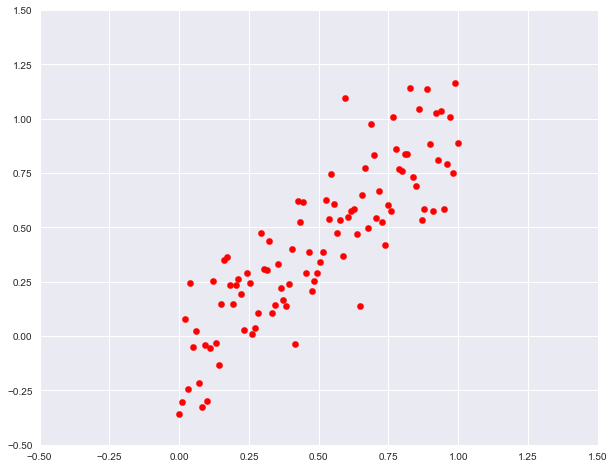

In [2]:
np.random.seed(1111)

N = 100 # number of points per class

X = np.linspace(0.0,1,N) 
y = np.linspace(0.0,1,N) 

for j in range(N):
  y[j] = 1.1*X[j]+np.random.randn()*0.2-0.1

plt.scatter(X, y, c="red", s=40, cmap=plt.cm.Spectral)
plt.xlim([-0.5,1.5])
plt.ylim([-0.5,1.5])


***
***
***

# Part 1:  Let's explore gradient descent with this data

This is a pretty straight forward example!  We are using MSE for our loss in this example:

$\mathcal{L} = {1 \over N} \sum_{i=1}^N (W\times x_i + b - y_i)^2$

Here W is a weight and b is what's known as a bias variable.  You can just think of these as the slope and offset.  We also have the "targets" or truth labels for the data.  This is just the variable on the y-axis.

The gradients for variables W and b are given by the loss function's derivative:

${ d \mathcal{L} \over dW} = {2 \over N} \sum_{i=1}^N x_i (W\times x_i + b - y_i)$

${ d \mathcal{L} \over db} = {2 \over N} \sum_{i=1}^N (W\times x_i + b - y_i)$

Thus our gradient descent model follows directly:

$\beta^{(k+1)} = \beta^{(k)} - \alpha { d \mathcal{L} \over d\beta}$

Because this is a relatively straight forward problem, we can see that finding the correct solution depends on two things.  First, the number of iterations that we use to find the minimum.  Second, the size of the learning rate $\alpha$.  

step size 0.000500: loss 0.051302
step size 0.010000: loss 0.039991
step size 0.100000: loss 0.034278
step size 0.600000: loss 0.034278
step size 0.700000: loss 0.034278
[[ 0.69314397  0.15420757]
 [ 0.81519739  0.03310421]
 [ 1.07229351 -0.10468136]
 [ 1.07212177 -0.10458932]
 [ 1.07212177 -0.10458932]]


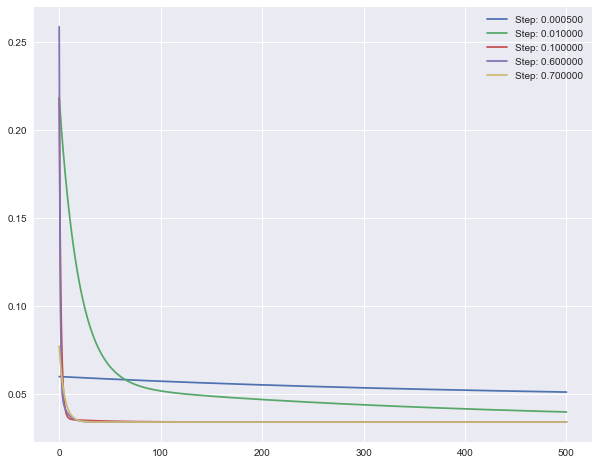

In [3]:
#Vary learning rate to see our dependence on it

def getCond(idx):
    if idx == 0:
        return 0.0005, 0.7, 0.2
    elif idx == 1:
        return 0.01, 0.4, -0.15
    elif idx == 2:
        return 0.1, 1.4, 0.15
    elif idx == 3:
        return 0.6, 0.4, -0.2
    elif idx == 4:
        return 0.7, 0.4, 0.3
    
# initialize parameters randomly
W = 0.5
b = 0

# some hyperparameters
step_size = 0.01  # why not make this 1.0?

Niter = 501
Nsteps = 5
dloss = np.zeros((Nsteps,Niter))
wloss = np.zeros((Nsteps,Niter))
bloss = np.zeros((Nsteps,Niter))
paramsFound = np.zeros((Nsteps,2))

# gradient descent loop
num_examples = X.shape[0]
for s in range(Nsteps):
    W = 0.25
    b = 0
    step_size, W, b = getCond(s)
    
    for i in range(Niter):
  
        # evaluate function values
        # fhat = W^TX +b
        fhat = W*X + b 
    
        # compute mean squared loss
        loss = np.sum((y-fhat)**2)/N
    
        # Total loss is the sum
        dloss[s,i] = loss
        wloss[s,i] = W
        bloss[s,i] = b
        #compute the loss gradients
        dW = -2*np.sum(X*(y-fhat))/N
        db = -2*np.sum(y-fhat)/N
    
        W -= step_size*dW
        b -= step_size*db

    print("step size %f: loss %f" % (step_size, loss))
    paramsFound[s,0] = W
    paramsFound[s,1] = b

print(paramsFound)    

for s in range(Nsteps):
    plt.plot(range(Niter),dloss[s,:],label=("Step: %f"%(getCond(s)[0])))
plt.legend()
plt.show()

***
***
***

# Reflection, part 1:

OK, that's pretty close to what we expected!  We expect to see that for a fixed number of iterations, the larger step sizes converge faster.  Let's make a 2D contour plot to see how far each iteration made it.  We can draw the steps taken during gradient descent to get a feeling for how each step size compares.  And we may as well make a surface plot to see the 3D shape of the loss function.


In [8]:
# let's plot our data to see if it makes sense!

delta = 0.01
a1 = np.arange(0.2, 1.5, delta)
a2 = np.arange(-0.25, 0.35, delta)
cX,cY = np.meshgrid(a1,a2)
vloss = np.zeros((a2.size,a1.size))

# compute mean squared loss
for iw in range(a1.size):
    for ib in range(a2.size):
        vloss[ib,iw] = np.sum((y-a1[iw]*X-a2[ib])**2)/N

        
fig,ax=plt.subplots(2,2,size=(12,12))
for ix in range(2):
    for iy in range(2):
        cp = ax[ix,iy].contourf(cX, cY, vloss,levels=50,cmap="cool")

colors = ["black","red","blue","green", "yellow"]
idx = 1
ax[0,0].scatter(paramsFound[idx,0],paramsFound[idx,1],marker='x',color=colors[idx-1],s=110)
ax[0,0].plot(wloss[idx,:],bloss[idx,:],color=colors[idx-1],label=("Step: %f"%getCond(idx)[0]))
idx += 1
ax[0,0].legend()
ax[0,1].plot(wloss[idx,:],bloss[idx,:],color=colors[idx-1],label=("Step: %f"%getCond(idx)[0]))
ax[0,1].scatter(paramsFound[idx,0],paramsFound[idx,1],marker='x',color=colors[idx-1],s=110)
idx += 1
ax[0,1].legend()
ax[1,0].plot(wloss[idx,:],bloss[idx,:],color=colors[idx-1],label=("Step: %f"%getCond(idx)[0]))
ax[1,0].scatter(paramsFound[idx,0],paramsFound[idx,1],marker='x',color=colors[idx-1],s=110)
idx += 1
ax[1,0].legend()
ax[1,1].plot(wloss[idx,:],bloss[idx,:],color=colors[idx-1],label=("Step: %f"%getCond(idx)[0]))
ax[1,1].scatter(paramsFound[idx,0],paramsFound[idx,1],marker='x',color=colors[idx-1],s=110)
ax[1,1].legend()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(cX,cY,vloss,cmap=cm.coolwarm,antialiased = True)
    
ax.set_xlabel("W", fontsize=18)
ax.set_ylabel("b", fontsize=18)
ax.set_zlabel("loss",fontsize=18)
plt.show()

TypeError: __init__() got an unexpected keyword argument 'size'

***
***
***

# Part 2: Let's try out some more challenging functions

The linear fit gave us a loss function that was not pathological at all.  Finding the minimum was more an exercise in patience than anything else.

We will consider [Beale's Function](https://en.wikipedia.org/wiki/Test_functions_for_optimization), a convex function often used to test optimization problems of the form:
$$z(x,y) = (1.5-x+xy)^2+(2.25-x+xy^2)^2+(2.625-x+xy^3)^2$$

When plotting Beale's Function, we'll use the log scale to actually visualize the contours.  

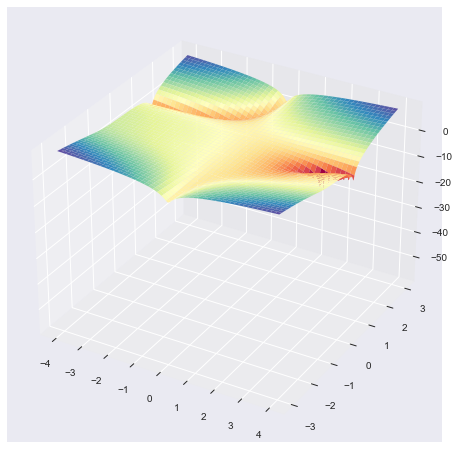

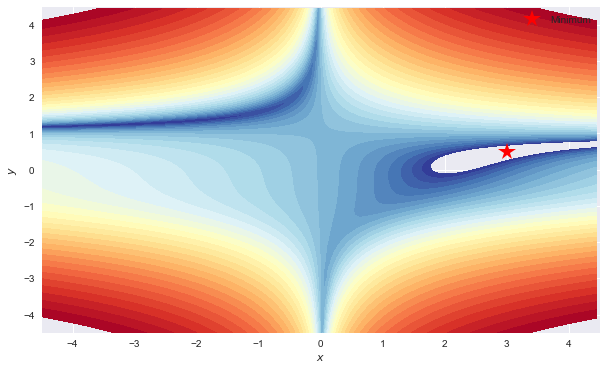

In [5]:
#Define Beale's Function and gradient
def beales_function(x,y):
    return np.square(1.5-x+x*y)+np.square(2.25-x+x*y*y)+np.square(2.625-x+x*y**3)
    return f

def grad_beales_function(params):
    x=params[0]
    y=params[1]
    grad_x=2*(1.5-x+x*y)*(-1+y)+2*(2.25-x+x*y**2)*(-1+y**2)+2*(2.625-x+x*y**3)*(-1+y**3)
    grad_y=2*(1.5-x+x*y)*x+4*(2.25-x+x*y**2)*x*y+6*(2.625-x+x*y**3)*x*y**2
    return [grad_x,grad_y]

def contour_beales_function():
    #plot beales function
    x, y = np.meshgrid(np.arange(-4.5, 4.5, 0.05), np.arange(-4.5, 4.5, 0.05))
    fig, ax = plt.subplots(figsize=(10, 6))
    z=beales_function(x,y)
    cax = ax.contourf(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap="RdYlBu_r")
    ax.plot(3,0.5, 'r*', markersize=18,label="Minimum")

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    ax.set_xlim((-4.5, 4.5))
    ax.set_ylim((-4.5, 4.5))
    ax.legend()
    
    return fig,ax
    
#Make plots 
ix, iy = np.meshgrid(np.arange(-4, 4, 0.01), np.arange(-3, 3, 0.01))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(ix,iy,np.log(beales_function(ix,iy)),cmap=cm.Spectral)

#Contour plot of Beale's Function
fig4,ax4 =contour_beales_function()
plt.show()

***
***
***
# Now let's try out gradient descent on Beale's Function!

We've defined the gradient above.  So now we just need to build some gradient descent functions to make our lives easier, then it's off to the races to see how the algorithms do!

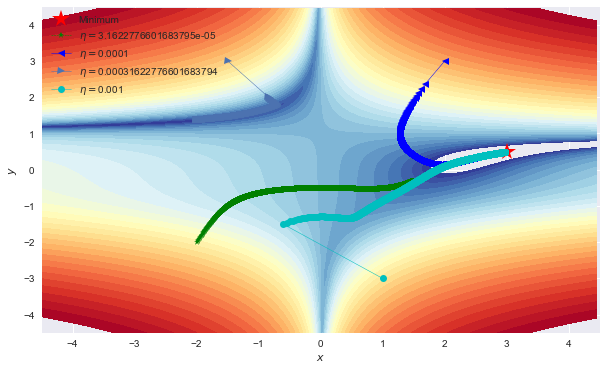

In [6]:
#Mean-gradient based methods
def gd(grad, init, n_epochs=1000, eta=10**-4, noise_strength=0):
    #This is a simple optimizer
    params=np.array(init)
    param_traj=np.zeros([n_epochs+1,2])
    param_traj[0,]=init
    dW=0;
    for j in range(n_epochs):
        noise=noise_strength*np.random.randn(params.size)
        dW=(np.array(grad(params))+noise)
        params=params-eta*dW
        param_traj[j+1,]=params
    return param_traj

def overlay_trajectory_contour(ax,trajectory, label,color='k',lw=2):
    xs=trajectory[:,0]
    ys=trajectory[:,1]
    ax.plot(xs,ys, color, label=label,lw=lw)
    return ax;

# Investigate effect of learning rate in GD
plt.close()


fig,ax =contour_beales_function()


#initial point
init1=[-2,-2]
init2=[2,3]
init3=[-1.5,3]
init4=[1,-3]

eta1=10**-4.5
eta2=10**-4
eta3=10**-3.5
eta4=10**-3

gd_1=gd(grad_beales_function,init1, n_epochs=10000, eta=eta1)
gd_2=gd(grad_beales_function,init2, n_epochs=10000, eta=eta2)
gd_3=gd(grad_beales_function,init3, n_epochs=10000, eta=eta3)
gd_4=gd(grad_beales_function,init4, n_epochs=10000, eta=eta4)

overlay_trajectory_contour(ax,gd_1,'$\eta=$%s'% eta1,'g--*',lw=0.5)
overlay_trajectory_contour(ax,gd_2,'$\eta=$%s'% eta2,'b-<', lw=0.5)
overlay_trajectory_contour(ax,gd_3,'$\eta=$%s'% eta3,'->', lw=0.5)
overlay_trajectory_contour(ax,gd_4,'$\eta=$%s'% eta4,'c-o', lw=0.5)
plt.legend(loc=2)
plt.show()